In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#colab github access
#!git clone https://github.com/your-username/snack-stress-behavior-ml.git
#df = pd.read_csv('snack-stress-behavior-ml/blob/master/data/RawData3.csv')

df = pd.read_csv('https://raw.githubusercontent.com/Kyleyuen97/snack-stress-behavior-ml/master/data/RawData3.csv')

print(df.shape)
print(df.columns)
df.head()



(368, 8)
Index(['SUBJECT', 'mYFAS 2.0', 'BMI', 'CSM score',
       'Negative Negative emotional eating', 'Positive Emotional Eating ',
       'Simplified food diversity questionnaire',
       'Nova Score for the consumption of UPFs'],
      dtype='object')


,SUBJECT,mYFAS 2.0,BMI,CSM score,Negative Negative emotional eating,Positive Emotional Eating,Simplified food diversity questionnaire,Nova Score for the consumption of UPFs
0,SUBJ001,0,20.1,19,7.3,5.4,4,2
1,SUBJ002,0,28.2,14,1.0,1.0,3,1
2,SUBJ003,6,31.8,19,7.8,1.0,5,2
3,SUBJ004,0,18.2,18,6.6,4.8,4,2
4,SUBJ005,0,18.3,14,4.1,5.8,6,3


In [26]:
#data cleaning
features = ['mYFAS 2.0', 'BMI', 'CSM score', 'Negative Negative emotional eating', 'Positive Emotional Eating ']
X = df[features]

In [27]:
#standardize the features (prevents features with larger scales from dominating distance calcs)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)

In [28]:
#testing different parameter settings for hierarchical
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linked = linkage(X_scaled, method='ward') #try ward to minize variance within cluster


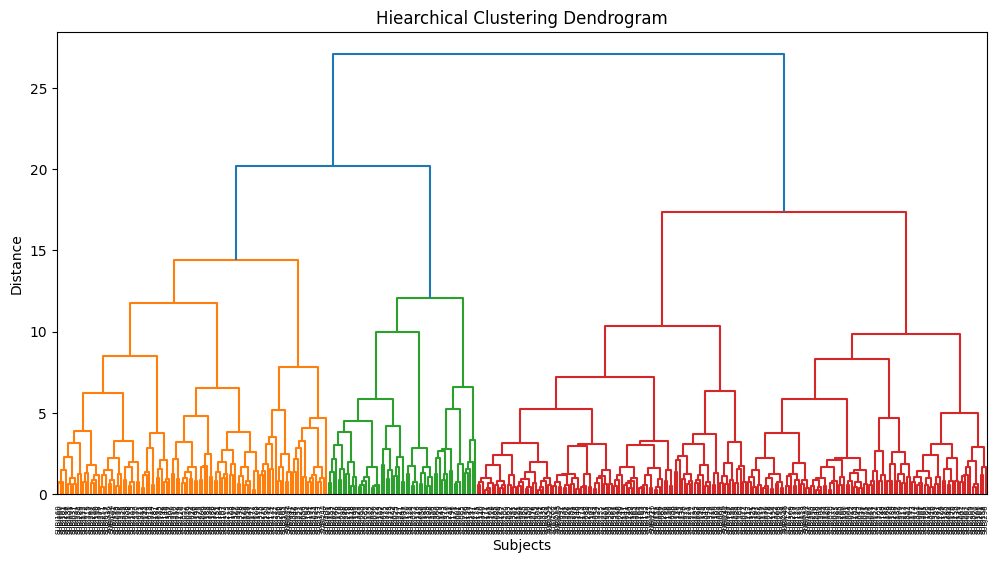

In [31]:
#plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
dendrogram(linked, labels=df['SUBJECT'].values,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hiearchical Clustering Dendrogram')
plt.xlabel('Subjects')
plt.ylabel('Distance')
plt.show()


In [35]:
#Test 4 clusters as thats the greatest vertical distance
num_clusters = 4
cluster_labels = fcluster(linked, num_clusters, criterion='distance') #maxclust not the goal here
#add cluster label back to dataframe
df['Cluster'] = cluster_labels
print(df.head())

   SUBJECT  mYFAS 2.0   BMI  CSM score  Negative Negative emotional eating  \
0  SUBJ001          0  20.1         19                                 7.3   
1  SUBJ002          0  28.2         14                                 1.0   
2  SUBJ003          6  31.8         19                                 7.8   
3  SUBJ004          0  18.2         18                                 6.6   
4  SUBJ005          0  18.3         14                                 4.1   

   Positive Emotional Eating   Simplified food diversity questionnaire  \
0                         5.4                                        4   
1                         1.0                                        3   
2                         1.0                                        5   
3                         4.8                                        4   
4                         5.8                                        6   

   Nova Score for the consumption of UPFs  Cluster  
0                                

#Analyzing the results
####What are the average stress scores per cluster?

####What are the average snack consumption scores per cluster?

####Are some clusters high stress, high snackers?

####Are some clusters low stress, low snackers?

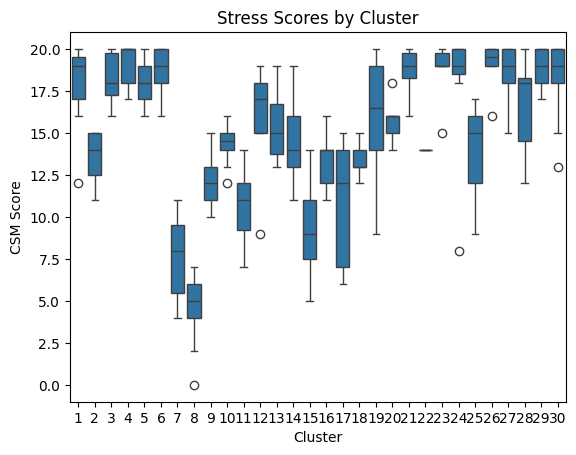

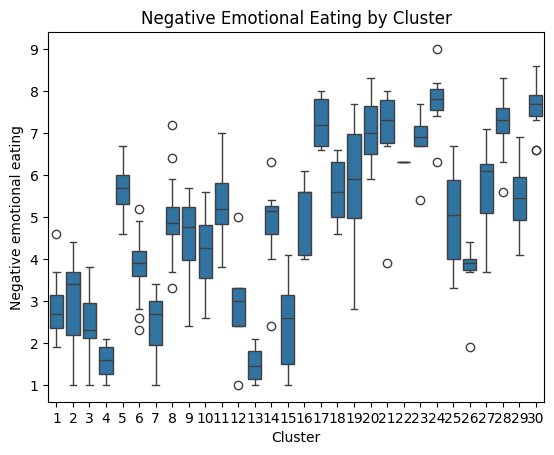

In [36]:

#Stress Score by Cluster
sns.boxplot(x='Cluster',y='CSM score',data=df)
plt.title('Stress Scores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('CSM Score')
plt.show()

#Snack Consumption by Cluster
sns.boxplot(x='Cluster',y='Negative Negative emotional eating',data=df)
plt.title('Negative Emotional Eating by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Negative emotional eating')
plt.show()

#Results - There is a correlation in the clusters -
# Distinct behavioral patterns among students around stress and snacking/food.

###Cluster 1-4,11-15 = High Stress, Low Negative Snacking
###Cluster 5 = High Stress, Moderate Negative Snacking
###Cluster 6-10 = Med-High Stress, Low Negative Snacking
###Cluster 16-20 = Med-High Stress, High Negative Snacking
###Cluster 20-30 Mostly High Stress, High Negative Snacking

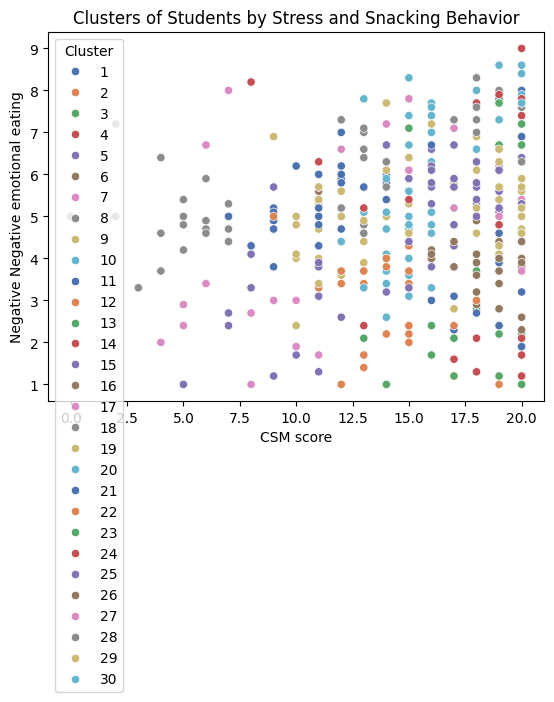

In [39]:
#additional scatterplot - needs refining
sns.scatterplot(x='CSM score', y='Negative Negative emotional eating', hue='Cluster', data=df, palette='deep')
plt.title('Clusters of Students by Stress and Snacking Behavior')
plt.show()